In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

In [5]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
print(scaled_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertia_values.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {'K': k_values, 'Inertia': inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
elbow_data = pd.DataFrame(elbow_dict)


# Display the DataFrame
print(elbow_data)


c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

    K     Inertia
0   1  287.000000
1   2  195.820218
2   3  123.190482
3   4   79.022435
4   5   66.413051
5   6   52.836588
6   7   44.341998
7   8   36.782663
8   9   32.802060
9  10   28.115863


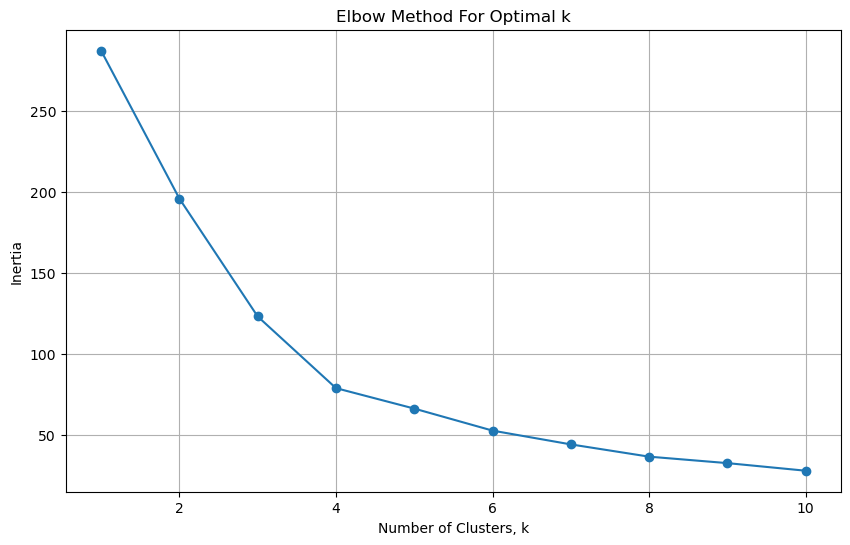

In [8]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_data['K'], elbow_data['Inertia'], marker='o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [10]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)



In [11]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)


c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_df)


# View the resulting array of cluster values.
print(clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [15]:
# Create a copy of the DataFrame
clustered_data = market_data_df.copy()


In [16]:
# Add a new column to the DataFrame with the predicted clusters
clustered_data['Cluster'] = clusters


# Display sample data
print(clustered_data.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

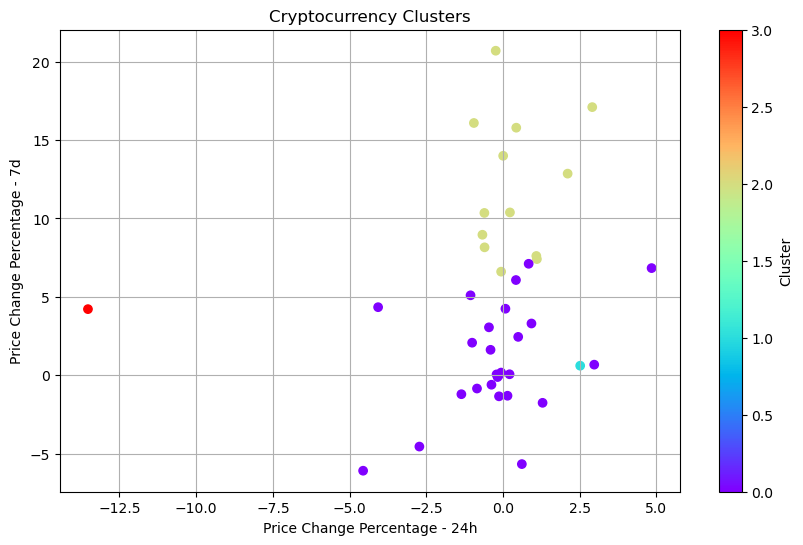

In [17]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.figure(figsize=(10, 6))
plt.scatter(clustered_data['price_change_percentage_24h'], clustered_data['price_change_percentage_7d'], c=clustered_data['Cluster'], cmap='rainbow')
plt.xlabel('Price Change Percentage - 24h')
plt.ylabel('Price Change Percentage - 7d')
plt.title('Cryptocurrency Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [20]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)


# View the first five rows of the DataFrame. 
pca_df = pd.DataFrame(pca_data, index=scaled_df.index, columns=['PC1', 'PC2', 'PC3'])
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [22]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")
total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance: {total_explained_variance}")

Explained Variance: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance: 0.8950316570309841

In [ ]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values_pca = range(1, 11)


# Create an empty list to store the inertia values
inertia_values_pca = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    model_pca = KMeans(n_clusters=k, random_state=42)
    model_pca.fit(pca_df)
    inertia_values_pca.append(model_pca.inertia_)


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve
elbow_data_pca = pd.DataFrame({'K': k_values_pca, 'Inertia': inertia_values_pca})


# Display the DataFrame
print(elbow_data_pca)


c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

    K     Inertia
0   1  256.874086
1   2  168.811896
2   3   93.774626
3   4   49.665497
4   5   37.878747
5   6   27.618972
6   7   21.182776
7   8   17.091637
8   9   13.667065
9  10   10.559358


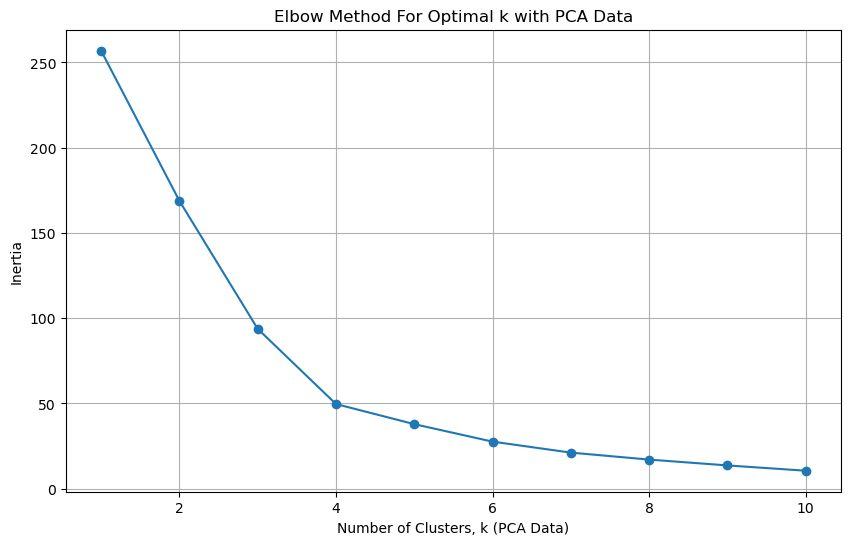

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_data_pca['K'], elbow_data_pca['Inertia'], marker='o')
plt.xlabel('Number of Clusters, k (PCA Data)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k with PCA Data')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4


In [27]:
# Fit the K-Means model using the PCA data
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42)
kmeans_pca.fit(pca_df)

c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Stephen Haldi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_df)


# Print the resulting array of cluster values.
print(clusters_pca)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [29]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_data = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clustered_data['Cluster'] = clusters_pca


# Display sample data
print(pca_clustered_data.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        3
ethereum     -0.458261  0.458466  0.952877        3
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        3


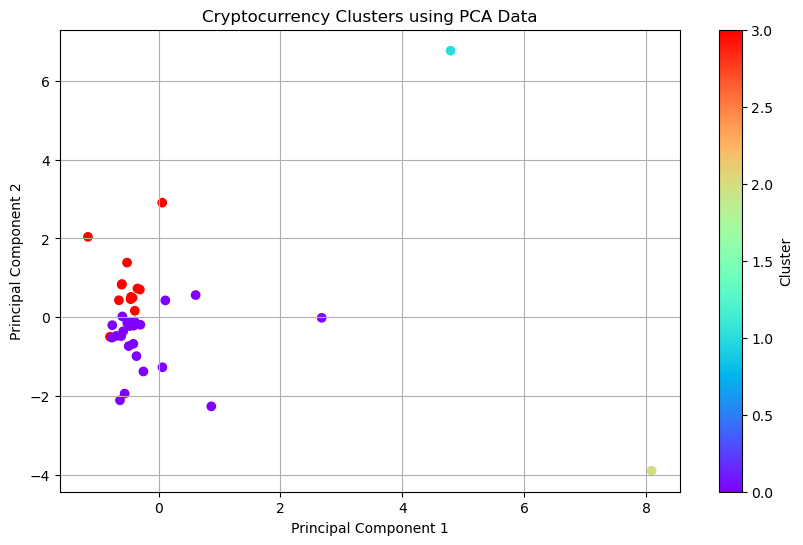

In [30]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
plt.figure(figsize=(10, 6))
plt.scatter(pca_clustered_data['PC1'], pca_clustered_data['PC2'], c=pca_clustered_data['Cluster'], cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cryptocurrency Clusters using PCA Data')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Determine the Weights of Each Feature on each Principal Component

In [31]:
# Use the columns from the original scaled DataFrame as the index.
loadings = pca.components_

# Create a DataFrame that shows these weights for easier analysis
loadings_df = pd.DataFrame(loadings, columns=scaled_df.columns, index=['PC1', 'PC2', 'PC3'])

# Display the loadings
print(loadings_df)

     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.416728                   -0.102432   
PC2                     0.358162                    0.227432   
PC3                    -0.218795                    0.787670   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                    -0.009162                     0.191523   
PC2                     0.540415                     0.562182   
PC3                     0.349534                    -0.181744   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.320365                      0.594468   
PC2                     0.434040                      0.027735   
PC3                    -0.361377                      0.039733   

     price_change_percentage_1y  
PC1                    0.568379  
PC2                   -0.150789  
PC3                    0.210541  


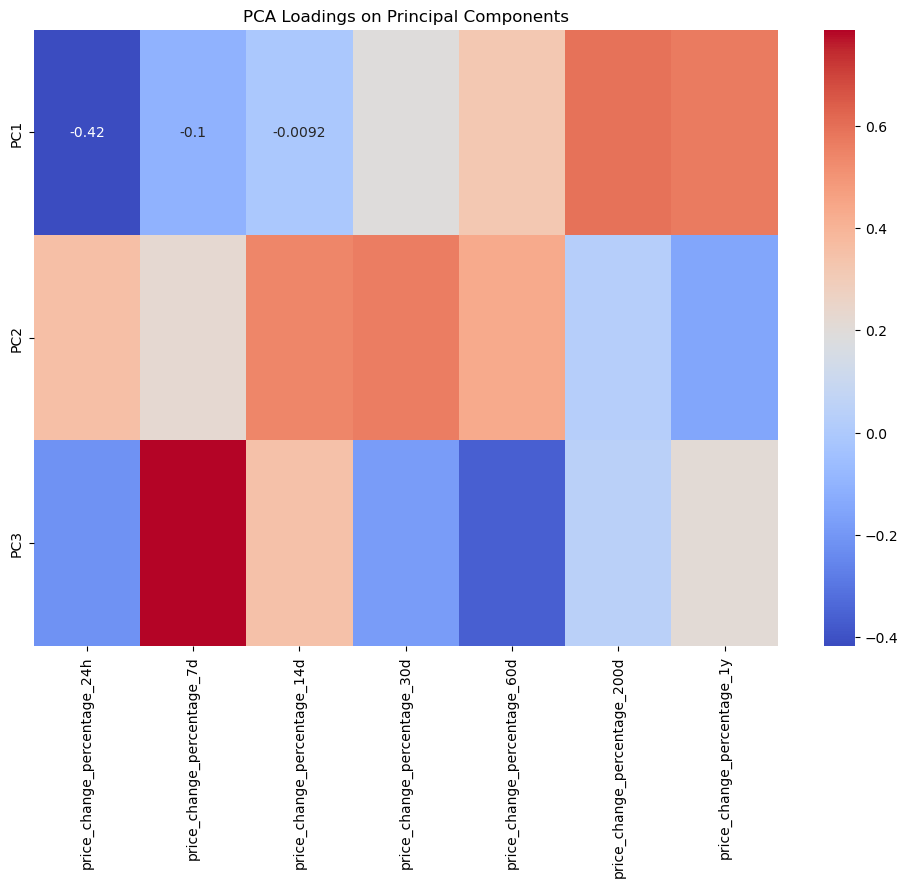

Strongest positive influence on each component:
PC1    price_change_percentage_200d
PC2     price_change_percentage_30d
PC3      price_change_percentage_7d
dtype: object
Strongest negative influence on each component:
PC1    price_change_percentage_24h
PC2     price_change_percentage_1y
PC3    price_change_percentage_60d
dtype: object


In [32]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings on Principal Components')
plt.show()

# Determine which features have the strongest influence on each principal component
strongest_features = loadings_df.idxmax(axis=1)
print("Strongest positive influence on each component:")
print(strongest_features)

weakest_features = loadings_df.idxmin(axis=1)
print("Strongest negative influence on each component:")
print(weakest_features)

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Strongest positive influence on each component:
    PC1    price_change_percentage_200d
    PC2     price_change_percentage_30d
    PC3      price_change_percentage_7d
              Strongest negative influence on each component:
    PC1    price_change_percentage_24h
    PC2     price_change_percentage_1y
    PC3    price_change_percentage_60d
    